[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JuanCervigon/Master/blob/main/022%20Distribucion%20Normal%20multivariada.ipynb)

# Distribución Normal multi-variada

La densidad de la distribución normal multivariada es:


$p(x)=\frac{1}{(2\pi)^{d/2}|∑|^{-1}}e^{(-1/2)(x-\mu)'∑^{-1}(x-\mu)}$


In [1]:
# importar librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal


# Densidad

Calcular la densidad de la normal bi-variada

Calcular la densidad de una trama de puntos de la normal bi-variada y hacer un gráfico

In [ ]:
# Parametros, vector de medias y matriz de covarianzas
media=np.array([0,0])
covarianza=np.array([[1,.8],[.8,1]])

# Densidad en un punto

punto=[0,0]

densidad=multivariate_normal.pdf(punto,mean=media,cov=covarianza)

print("La densidad del punto", punto, "es", densidad)

La densidad del punto [0, 0] es 0.26525823848649227


In [ ]:
# Construir una trama de puntos
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
x, y = np.meshgrid(x, y)
trama = np.dstack((x, y))

# Función de densidad
superficie=multivariate_normal.pdf(trama,mean=media,cov=covarianza)


In [ ]:
# Nota aclaratoria sobre np.dstack
# El método dstack une los arrays en el eje de la prfundidad (depth)
# Devuelve un array 3D si se le pasan dos arrays 2D del mismo tamaño
a = np.array([[0,0,0], [1,1,1],[2,2,2]])
b = np.array([[0,1,2],[0,1,2],[0,1,2]])
c = np.dstack((a, b))
print(c)

[[[0 0]
  [0 1]
  [0 2]]

 [[1 0]
  [1 1]
  [1 2]]

 [[2 0]
  [2 1]
  [2 2]]]


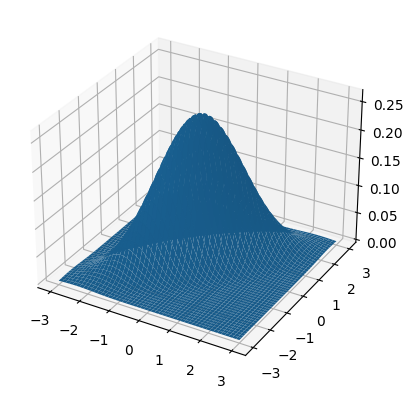

In [ ]:
# Gráfico de superficie en tres dimensiones

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,superficie);

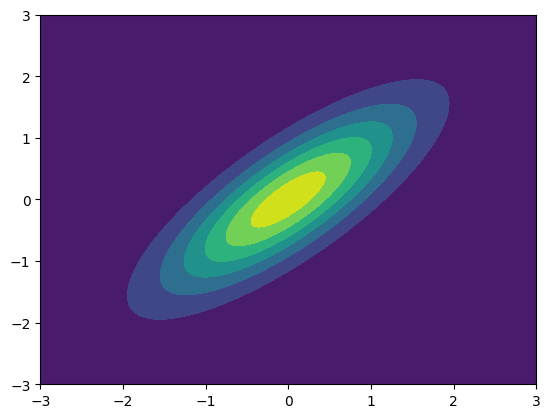

In [ ]:
# Ahora un gráfico de contorno

fig2, ax2 = plt.subplots()
ax2.contourf(x, y, superficie);

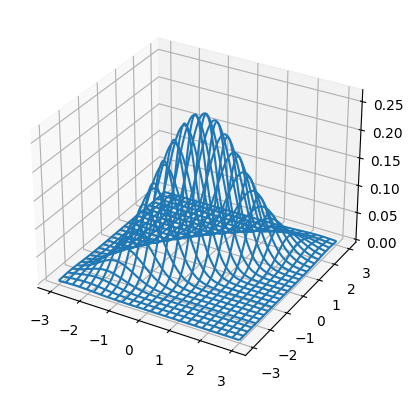

In [ ]:
# Gráfico de superficie-malla

fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
ax3.plot_wireframe(x,y,superficie, rstride=20, cstride=20);


# Numeros aleatorios

La generación de números aleatorios es el proceso inverso. Antes hemos calculado la densidad de un punto. Ahora vamos a calcular un conjunto de números que obedecen una determinada distribución.



In [ ]:
# Creación del generador
generador=np.random.default_rng()


In [ ]:
# Por ejemplo, generamos 100 numeros aleatorios entre 0 y 1
# y los guardamos en el vector x

x=generador.random(100)
x

array([0.54186727, 0.78810622, 0.69729704, 0.2851058 , 0.40017445,
       0.34144094, 0.80996244, 0.51915162, 0.74761619, 0.820429  ,
       0.65675744, 0.83759773, 0.33136471, 0.61745626, 0.26433482,
       0.34432585, 0.80041215, 0.44760131, 0.25087441, 0.03234619,
       0.88655431, 0.79408219, 0.34260684, 0.54567482, 0.46561846,
       0.49976462, 0.06167695, 0.92411262, 0.39824773, 0.76262147,
       0.72518435, 0.38342421, 0.59798104, 0.25314448, 0.80333178,
       0.37432272, 0.61127346, 0.18269223, 0.58795481, 0.9752294 ,
       0.49947233, 0.06389017, 0.84298794, 0.79038228, 0.5181975 ,
       0.23864138, 0.02707686, 0.88819818, 0.64218664, 0.74413654,
       0.15087246, 0.78853425, 0.87831964, 0.94862756, 0.93785569,
       0.84429061, 0.39667   , 0.33660288, 0.34783211, 0.9111296 ,
       0.30854784, 0.2797238 , 0.89530709, 0.7359526 , 0.62632452,
       0.82750518, 0.25810861, 0.2341471 , 0.58012288, 0.127097  ,
       0.35209798, 0.82809223, 0.93367432, 0.31324881, 0.44790

In [ ]:
# Generamos 50.000 números aleatorios normal bi-variados
# y los guardamos en la matriz numeros_bivariados
media = [0, 0]
covarianza = [[1, .9], [.9, 1]]
numeros_bivariados=generador.multivariate_normal(media, covarianza, 50000)


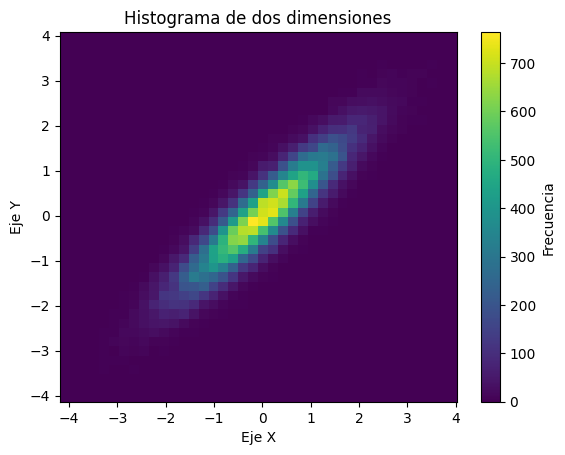

In [ ]:
# Hacemos un histograma de 2 dimensiones con matplotlib.pyplot
x=numeros_bivariados[:,0]
y=numeros_bivariados[:,1]

# Definir el gráfico
plt.hist2d(x,y,bins=40)

# Añadir etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Histograma de dos dimensiones')

# Añadir barra de color
plt.colorbar(label='Frecuencia')

# Mostrar el histograma
plt.show()


In [ ]:
# Histograma de dos dimensiones con Numpy (sin gráfico)

x=numeros_bivariados[:,0]
y=numeros_bivariados[:,1]
z,x,y=np.histogram2d(x,y,bins=50)

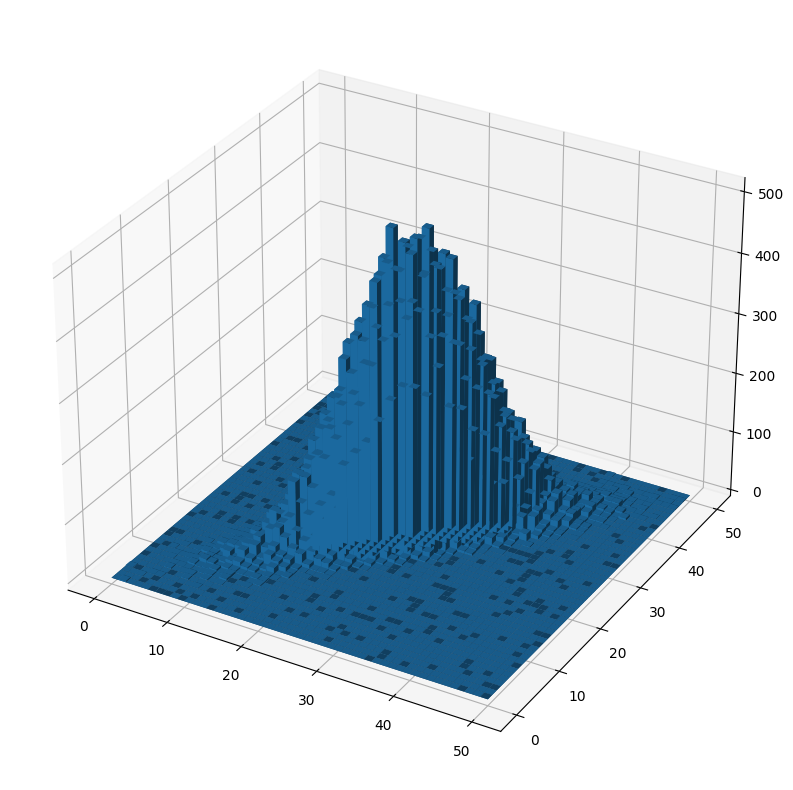

In [ ]:
# Gráfico del histograma
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(121, projection='3d')

_x = np.arange(50)
_y = _x
_xx, _yy = np.meshgrid(_x, _y)

a=_xx.ravel()
b=_yy.ravel()
top=z.ravel()

bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(a, b, bottom, width, depth, top, shade=True);


# Teorema central del limite

## Suma de variables aleatorias discretas uniforme

Vamos a simular el lanzamiento de 1.000 dados y vamos a sumar el resultado

La variable aleatoria "sumar el lanzamiento de 1.000 datos" toma valores entre 1.000 y 6.000

¿Qué distribución de probabilidad tiene?

Según el teorema central del limite tiene una distribución parecida a la normal, de media 3.500 (=3,5 x 1.000)y varianza 2.917 (=2,917 x 1.000)

Para comprobarlo vamos a simular 5.000 veces la suma del lanzamiento de 1.000 dados y luego veremos la distribución de las 5.000 observaciones

In [ ]:
# Volvemos a definir el generador
generador=np.random.default_rng()

# Generar el lnzamiento de un dado
x=generador.integers(1,7, size=1)
x




In [ ]:
# Generar el lanzamiento de 1.000 dados y sumar el resultado

x=generador.integers(1,7, size=1000)
y=sum(x)
y

3477

In [ ]:
# Generar 5.000 veces el lanzamiento de 1.000 dados

x=generador.integers(1,7, size=[1000,5000])
y=sum(x)
y

array([3438, 3510, 3438, ..., 3515, 3458, 3453])

In [ ]:
y.mean()

3499.2052

In [ ]:
np.var(y)

3099.46349296

In [ ]:
np.std(y)

55.672825444376365

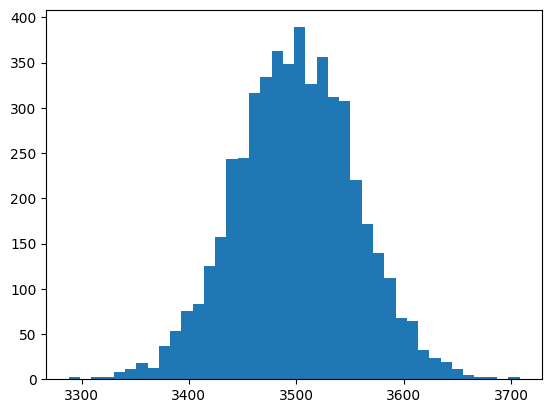

In [ ]:
plt.hist(y,bins=40);

## Suma de variables aleatorias uniformes

Ahora vamos a sumar 2.000 variables aleatorias

In [ ]:
# Volvemos a definir el generador
generador=np.random.default_rng()

# Generamos 7.000 veces la suma de 2.000 va
x=generador.random(size=[1000,5000])
y=sum(x)
y


array([507.06618702, 500.47751319, 492.44209785, ..., 493.05359897,
       503.70226886, 498.84929413])

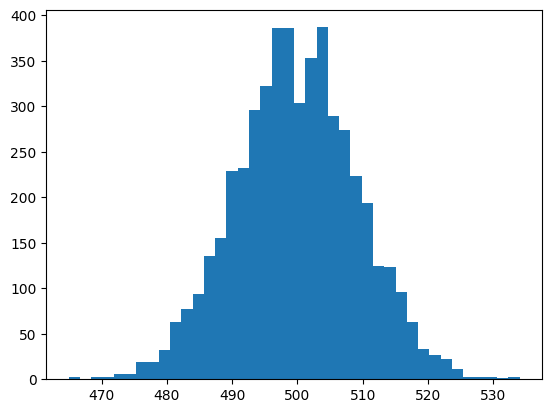

In [ ]:
plt.hist(y,40);

## Suma de variables aleatorias exponenciales

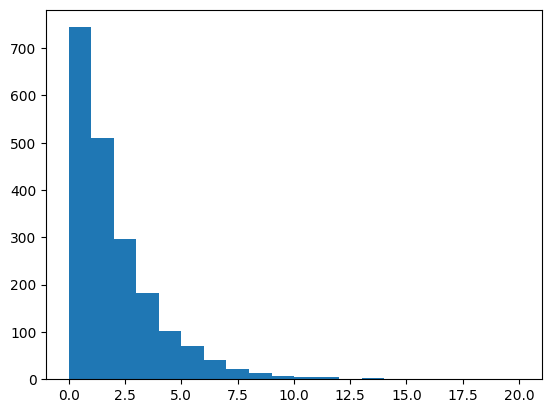

In [ ]:
# Generamos 2.000 números aleatorios exponenciales de media 2
x=generador.exponential(2,size=2000)

# Hacemos un histograma
plt.hist(x,bins=20);

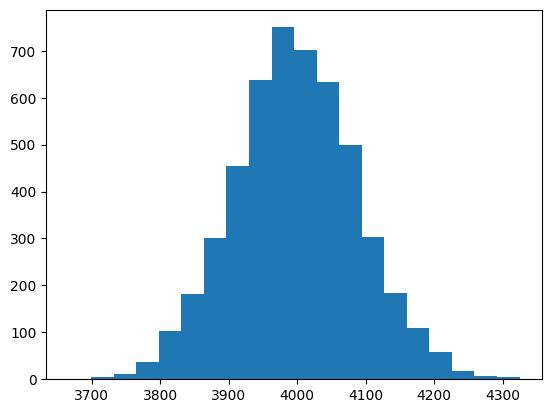

In [ ]:
# Generamos 2.000 veces la suma de 5.000 va
x=generador.exponential(2,size=[2000,5000])
y=sum(x)

# Histograma
plt.hist(y,bins=20);



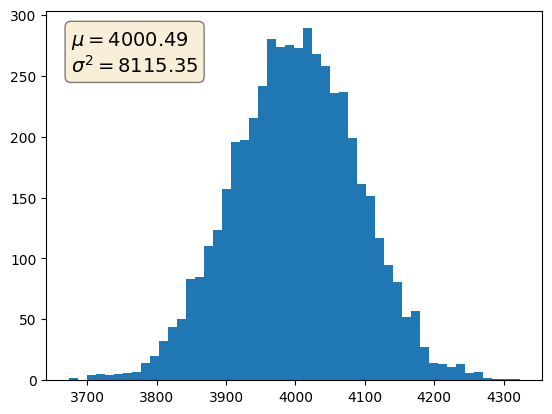

In [ ]:
# El mismo gráfico con anotaciones

fig, ax = plt.subplots()

media = np.mean(y)
var = np.var(y)

# Definimos el texto a añadir añ gráfico
texto = '\n'.join((
    r'$\mu=%.2f$' % (media ),
    r'$\sigma^2=%.2f$' % (var )))

ax.hist(y, 50)

# Definimos las propiedades de la caja donde colocamos el texto
caja = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Colocar la caja de texto arriba y a la izquierda
ax.text(0.05, 0.95, texto, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=caja)

plt.show()